使用許諾条件

①	設計一次エネルギー消費量算定法に基づく計算方法をPythonによりコーディングし、Jupyter notebook形式で保存したファイル（以下、本ファイルと呼ぶ）の著作権は、一般社団法人日本サステナブル建築協会に帰属します。
Copyright©2019. 一般社団法人日本サステナブル建築協会
All rights reserved. 

②	本ファイルは、住戸の設計一次エネルギー消費量算定方法に係る「平成28年省エネルギー基準に準拠したエネルギー消費性能の評価に関する技術情報（住宅）2.1算定方法（第四章第六節 電気蓄熱暖房器）」に示す計算方法に基づき、国土交通省国土技術政策総合研究所・国立研究開発法人建築研究所、株式会社ユーワークス、株式会社住環境計画研究所が作成したものです。

③	本ファイルは、計算方法に示す計算過程の確認及び調査研究等に活用することを目的として作成されたものであり、一般社団法人日本サステナブル建築協会は著作権について放棄はしませんが、使用する各人の自己責任において仕様を変更することを妨げるものではありません。ただし、本ファイルによる計算結果を住宅の省エネルギー基準で規定する設計一次エネルギー消費量の結果として公的な申請に用いることはできません。

④	本ファイルを変更するかしないかを問わず、以下の条件を満たす場合に限り、頒布および使用が許可されます。
1.	頒布物の付属ドキュメント等の資料に、上記の著作権表示、本条件一覧、および下記免責条項を含めること。
2.	書面による特別の許可なしに、本ファイルから派生した製品の宣伝または販売の促進に、一般社団法人日本サステナブル建築協会、国土技術政策総合研究所・国立研究開発法人建築研究所および株式会社ユーワークス、株式会社住環境計画研究所の名前またはコントリビューターの名前を使用してはならない。

⑤	本ファイルは、著作権者およびコントリビューターによって「現状のまま」提供されており、明示黙示を問わず、商業的な使用可能性、および特定の目的に対する適合性に関する暗黙の保証も含め、またそれに限定されない、いかなる保証もありません。著作権もコントリビューターも、事由のいかんを問わず、損害発生の原因いかんを問わず、かつ責任の根拠が契約であるか厳格責任であるか（過失その他の）不法行為であるかを問わず、仮にそのような損害が発生する可能性を知らされていたとしても、本ファイルの使用によって発生した（代用品または代用サービスの調達、使用の喪失、データの喪失、利益の喪失、業務の中断も含め、またそれに限定されない）直接損害、間接損害、偶発的な損害、特別損害、懲罰的損害、または結果損害について、一切の責任を負わないものとします。



In [1]:
import nbimporter
import numpy as np
from s04_01_general_Q import get_Q_T_H_d_t_i

Importing Jupyter notebook from s04_01_general_Q.ipynb


## 第六節　電気蓄熱暖房器 / Section 6 Electric thermal storage type heating

1．適用範囲～4．記号及び単位は省略

1. Scope of application ~ 4. Symbols and units are omitted

### 5．最大暖房出力 / Maximum heating output

$$\large
Q_{max,H,d,t} = q_{rtd,H} \times 3600 \times 10^{-6}
$$

$Q_{max,H,d,t}$：日付$d$の時刻$t$における1時間当たりの最大暖房出力(MJ/h) / Maximum heating output per hour at time $ t $ of date $ d $  
$q_{rtd,H}$：定格暖房能力(W) / Rated heating capacity

In [2]:
def get_Q_max_H_d_t(q_rtd_H):
    """最大暖房出力
    
    :param q_rtd_H: 定格暖房能力
    :type q_rtd_H: float
    :return: 最大暖房出力
    :rtype: ndarray
    """
    return np.ones(24 * 365) * (q_rtd_H * 3600 / 1000000)  # (1)

### 6．暖房エネルギー消費量 / Heating energy consumption

#### 6.1　消費電力量 / Power consumption

$$
\large
E_{E,H,d,t} = Q_{T,H,d,t} \times \frac{1}{e_{rtd,H}} \times 10^3 \div 3600
$$

$E_{E,H,d,t}$：日付$d$の時刻$t$における1時間当たりの消費電力量(kWh/h) / Power consumption per hour at time $ t $ of date $ d $  
$Q_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの処理暖房負荷(MJ/h) / Processing heating load per hour at time $ t $ of date $ d $  
$e_{rtd,H}$：蓄熱効率 / Heat storage efficiency 

In [3]:
def calc_E_E_H_d_t(q_rtd_H, e_rtd_H, L_H_d_t):
    """暖房エネルギー消費量
    
    :param q_rtd_H: 定格暖房能力
    :type q_rtd_H: float
    :param e_rtd_H: 定格暖房エネルギー消費効率
    :type e_rtd_H: float
    :param L_H_d_t: 暖冷房区画の１時間当たりの暖房負荷 
    :type L_H_d_t: ndarray
    :return: 暖房エネルギー消費量
    :rtype: ndarray
    """
    # 最大暖房出力
    Q_max_H_d_t = get_Q_max_H_d_t(q_rtd_H)

    # 処理暖房負荷
    Q_T_H_d_t = get_Q_T_H_d_t_i(Q_max_H_d_t, L_H_d_t)

    return Q_T_H_d_t * (1.0 / e_rtd_H) * 1000 / 3600  # (2)

#### 6.2　ガス消費量 / Gas consumption

日付$d$の時刻$t$における１時間当たりのガス消費量$E_{G,H,d,t}$は0とする。

It is assumed that gas consumption $ E_{G, H, d, t} $ per hour at time $ t $ of date $ d $ is zero.

In [4]:
def get_E_G_H_d_t():
    """ガス消費量
    
    :return: ガス消費量
    :rtype: ndarray
    """
    return np.zeros(24 * 365)

#### 6.3　灯油消費量 / Kerosene consumption

日付$d$の時刻$t$における１時間当たりの灯油消費量$E_{K,H,d,t}$は0とする。

It is assumed that kerosene consumption $ E_{K, H, d, t} $ per hour at time $ t $ of date $ d $ is zero.

In [5]:
def get_E_K_H_d_t():
    """灯油消費量
    
    :return: 灯油消費量
    :rtype: ndarray
    """
    return np.zeros(24 * 365)

#### 6.4　その他の燃料による一次エネルギー消費量 / Primary energy consumption by other fuels

日付$d$の時刻$t$における１時間当たりのその他の燃料による一次エネルギー消費量$E_{M,H,d,t}$は0とする。

Primary energy consumption $ E_{M, H, d, t} $ by other fuel per hour at time $ t $ of date $ d $ is 0.

In [6]:
def get_E_M_H_d_t():
    """その他の燃料による一次エネルギー消費量

    :return: その他の燃料による一次エネルギー消費量
    :rtype: ndarray
    """
    return np.zeros(24 * 365)

## 付録 A 機器の性能を表す仕様の決定方法 / Appendix A How to determine the specification that represents the performance of the device

### A.1　記号及び単位 / Symbol and unit

省略

ommision

### A.2　定格暖房能力 / Rated heating capacity

$$\large
q_{rtd,H} = q_{rq,H} \times A_{HCZ} \times f_{cT} \times f_{cI}
$$

$q_{rtd,H}$：定格暖房能力(kWh/h) / Rated heating capacity  
$q_{rq,H}$：単位面積当たりの必要暖房能力(W/m<sup>2</sup>) / Required heating capacity per unit area  
$A_{HCZ}$：電気蓄熱暖房器により暖房される暖冷房区画の床面積(m<sup>2</sup>) / Floor area of heating and cooling compartments heated by electric heat storage heater  
$f_{cT}$：外気温度能力補正係数 / Outside air temperature ability correction factor  
$f_{cI}$：間歇運転能力補正係数 / Intermittent driving ability correction factor  

外気温度補正係数$f_{cT}$の値は1.05とする。

The value of the outside air temperature correction coefficient $ f_{cT} $ is set to 1.05.

In [7]:
def get_q_rtd_H(q_rq_H, A_HCZ, f_cT, f_cI):
    """定格暖房能力
    
    :param q_rq_H: 単位面積当たりの必要暖房能力
    :type q_rq_H: float
    :param A_HCZ: 暖冷房区画の床面積
    :type A_HCZ: float
    :param f_cT: 外気温度補正係数
    :type f_cT: float
    :param f_cI: 間歇運転能力補正係数
    :type f_cI: float
    :return: 定格暖房能力
    :rtype: float
    """
    return q_rq_H * A_HCZ * f_cT * f_cI  # (1)

In [8]:
# 単位面積当たりの必要暖房能力
def calc_q_rq_H(region):
    """単位面積当たりの必要暖房能力
    
    :param region: 地域区分
    :type region: int
    :return: 単位面積当たりの必要暖房能力
    :rtype: float
    """
    table_a_2 = get_table_a_2()

    return table_a_2[region - 1]

In [9]:
# 外気温度補正係数
def get_f_cT(region):
    """外気温度補正係数
    
    :param region: 地域区分
    :type region: int
    :return: 外気温度補正係数
    :rtype: float
    """
    return 1.05

In [10]:
# 間歇運転能力補正係数
def calc_f_cI(mode, R_type):
    """間歇運転能力補正係数
    
    :param mode: 運転方式
    :type mode: str
    :param R_type: 居室の形式
    :type R_type: string
    :raises ValueError: modeが'ろ', '連続', 'は', '間歇'以外の場合に発生
    :raises ValueError: R_typeが'主たる居室', 'その他の居室'以外の場合に発生
    :return: 間歇運転能力補正係数
    :rtype: float
    """
    if mode in ['ろ', '連続']:
        y = 0
    elif mode in ['は', '間歇']:
        y = 1
    else:
        raise ValueError(mode)

    if R_type == '主たる居室':
        x = 0
    elif R_type == 'その他の居室':
        x = 1
    else:
        raise ValueError(R_type)

    table_a_3 = get_table_a_3()

    return table_a_3[y][x]

<div style="text-align: center;font-weight: bold;">表　単位面積当たりの必要暖房能力（W/m<sup>2</sup>）<br>Table: Required heating capacity per unit area</div>

|地域の区分<br>Segmentation of area|1|2|3|4|5|6|7|8|
|-|-|-|-|-|-|-|-|-|
|　|139.3|120.7|111.3|119.0|126.6|106.5|112.9|-|

In [11]:
def get_table_a_2():
    """表A.2 単位面積当たりの必要暖房能力
    
    :return: 単位面積当たりの必要暖房能力
    :rtype: list
    """
    # 表A.2 単位面積当たりの必要暖房能力
    table_a_2 = [
        139.3,
        120.7,
        111.3,
        119.0,
        126.6,
        106.5,
        112.9
    ]
    return table_a_2

<div style="text-align: center;font-weight: bold;">表　間歇運転能力補正係数<br>Table: Intermittent driving ability correction factor</div>

|　|主たる居室<br>Main room|その他の居室<br>Other rooms|
|-|-|-|
|連続運転の場合<br>In case of continuous operation|1.0|1.0|
|間歇運転の場合<br>In case of intermittent operation|3.034|4.805|

In [12]:
def get_table_a_3():
    """ 表A.3 間歇運転能力補正係数
    
    :return: 間歇運転能力補正係数
    :rtype: list
    """
    # 表A.3 間歇運転能力補正係数
    table_a_3 = [
        (1.0, 1.0),
        (3.034, 4.805)
    ]
    return table_a_3

### A.3　蓄熱効率 / Heat storage efficiency 

蓄熱効率$e_{rtd.H}$は0.850（85.0%）とする。 

The heat storage efficiency $ e_{rtd. H} $ is 0.850 (85.0%).

In [13]:
def get_e_rtd_H():
    """蓄熱効率
    
    :return: 蓄熱効率
    :rtype: float
    """
    return 0.850

## 試算例

|名称1|名称2|変数名|計算条件1|計算条件2|計算条件3|計算条件4|計算条件5|計算条件6|計算条件7|
|----|------|--|--|--|--|--|--|--|--|
|地域の区分|-|$ region$|6|**1**|6|6|6|6|6|
|延床面積|合計|$A_A$|120.08|120.08|**90**|120.08|120.08|120.08|120.08|
|延床面積|主居室|$A_{MR}$|29.81|29.81|**25**|29.81|29.81|29.81|29.81|
|延床面積|その他居室|$A_{OR}$|51.34|51.34|**40**|51.34|51.34|51.34|51.34|
|外皮面積|-|$A_{env}$|307.51|307.51|**250**|307.51|307.51|307.51|307.51|
|外皮平均熱貫流率|-|$U_A$|0.87|0.87|0.87|**0.6**|0.87|0.87|0.87|
|暖房期平均日射熱取得率|-|$\eta_{AH}$|4.3|4.3|4.3|4.3|**3.0**|4.3|4.3|
|冷房期平均日射熱取得率|-|$\eta_{AC}$|2.8|2.8|2.8|2.8|2.8|**2.0**|2.8|
|主居室|暖房設備|$type$|電気蓄暖|電気蓄暖|電気蓄暖|電気蓄暖|電気蓄暖|電気蓄暖|電気蓄暖|
|その他居室|暖房設備|$type$|-|-|-|-|-|-|**電気蓄暖**|
|暖冷房区画の番号|-|$i$|1|1|1|1|1|1|**5**|



In [14]:
def calc_Q_UT_H_d_t(q_rtd_H, e_rtd_H, L_H_d_t):
    """処理暖房負荷
    
    :param q_rtd_H: 定格暖房能力
    :type q_rtd_H: float
    :param e_rtd_H: 定格暖房エネルギー消費効率
    :type e_rtd_H: float
    :param L_H_d_t: 暖冷房区画の１時間当たりの暖房負荷 
    :type L_H_d_t: ndarray
    :return: 処理暖房負荷
    :rtype: ndarray
    """
    # 最大暖房出力
    Q_max_H_d_t = get_Q_max_H_d_t(q_rtd_H)

    # 処理暖房負荷
    Q_T_H_d_t = get_Q_T_H_d_t_i(Q_max_H_d_t, L_H_d_t)

    return L_H_d_t - Q_T_H_d_t

In [15]:
def calc_results(param, H_MR, H_OR, i):

    if __name__ == "__main__":

        from s02_01_b_heat_conversion_coefficient import get_f_prim
        from s03_01_hc_load_general import get_Q, get_A_HCZ_i
        from s03_02_envelope_performance import calc_r_env, get_Q_dash, get_eta_H, get_eta_C
        from s04_01_general import calc_heating_load, get_alpha_UT_H_MR, get_alpha_UT_H_OR
        from s04_01_a_heating_method import calc_heating_mode

        region = param["region"]
        sol_region = None
        A_A = param["A_A"]
        A_MR = param["A_MR"]
        A_OR = param["A_OR"]
        A_env = param["A_env"]
        U_A = param["U_A"]
        eta_A_H = param["eta_A_H"]
        eta_A_C = param["eta_A_C"]
        NV_MR = 0
        NV_OR = 0
        r_A_ufvnt = None
        underfloor_insulation = False
        TS = None
        HEX = None

        mode_C = None
        mode_H = '居室のみを暖房する方式でかつ主たる居室とその他の居室ともに温水暖房を設置する場合に該当しない場合'

        # 暖冷房区画の床面積
        A_HCZ = get_A_HCZ_i(i, A_A, A_MR, A_OR)

        # 暖房方式及び運転方法の区分
        mode_MR, mode_OR = calc_heating_mode(region=region, H_MR=H_MR, H_OR=H_OR)

        # 機器の性能
        q_rq_H = calc_q_rq_H(region)
        f_cI = calc_f_cI(mode = mode_MR if i == 1 else mode_OR, R_type = '主たる居室' if i == 1 else 'その他の居室')
        f_cT = get_f_cT(region)
        q_rtd_H = get_q_rtd_H(q_rq_H, A_HCZ, f_cT, f_cI)
        e_rtd_H = get_e_rtd_H()

        # 床面積の合計に対する外皮の部位の面積の合計の比
        r_env = calc_r_env(method='当該住戸の外皮の部位の面積等を用いて外皮性能を評価する方法',
                           A_env=A_env, A_A=A_A)

        # 熱損失係数
        Q_dash = get_Q_dash(U_A, r_env)
        Q = get_Q(Q_dash)

        # 日射取得係数
        mu_H = get_eta_H(eta_A_H, r_env)
        mu_C = get_eta_C(eta_A_C, r_env)

        # 暖房負荷
        L_H_d_t = \
            calc_heating_load(region, sol_region, A_A, A_MR, A_OR, Q, mu_H, mu_C, NV_MR, NV_OR, TS, r_A_ufvnt, HEX,
                              underfloor_insulation, mode_H, mode_C, spec_MR=H_MR, spec_OR=H_OR, mode_MR=mode_MR, mode_OR=mode_OR, SHC=None)[0][i-1]

        # エネルギー消費量
        E_E_H_d_t = calc_E_E_H_d_t(q_rtd_H, e_rtd_H, L_H_d_t)
        E_G_H_d_t = get_E_G_H_d_t()
        E_K_H_d_t = get_E_K_H_d_t()
        E_M_H_d_t = get_E_M_H_d_t()

        # 未処理暖房負荷の設計一次エネルギー消費量相当値
        Q_UT_H_d_t = calc_Q_UT_H_d_t(q_rtd_H, e_rtd_H, L_H_d_t)
        alpha_UT_H = get_alpha_UT_H_MR(region, mode_MR) if i == 1 else get_alpha_UT_H_OR(region, mode_OR)
        E_UT_H_d_t = Q_UT_H_d_t * alpha_UT_H

        f_prim = get_f_prim()
        E_H_d_t = E_E_H_d_t * f_prim / 1000 + E_G_H_d_t + E_K_H_d_t + E_M_H_d_t + E_UT_H_d_t
        print('E_H_d_t:{}MJ/y'.format(np.sum(E_H_d_t)))

        return E_H_d_t

In [16]:
def get_each_graph(_E_H_d_t):

    import matplotlib.pyplot as plt

    _E_H_d = np.sum(_E_H_d_t.reshape(365,24), axis = 1)

    fig = plt.figure(figsize = (20,7))

    grh_day = fig.add_subplot(211)
    grh_day.set_ylabel('MJ/d')
    grh_day.set_xlabel('day')
    grh_day.plot(_E_H_d, label = "E_H")
    grh_day.legend()

    grh_date = fig.add_subplot(212)
    grh_date.set_ylabel('MJ/h')
    grh_date.set_xlabel('hour')
    grh_date.plot(_E_H_d_t.reshape(365,24)[334], label = "E_H:12/1")
    grh_date.plot(_E_H_d_t.reshape(365,24)[59], label = "E_H:3/1")
    grh_date.legend()

    plt.show()


### 計算条件1

In [17]:
param = {"region": 6, "A_A": 120.08, "A_MR": 29.81, "A_OR": 51.34, "A_env": 307.51, "U_A": 0.87, "eta_A_H": 4.3, "eta_A_C": 2.8}
H_MR = {'type': '電気蓄熱暖房器'}
H_OR = None
i = 1

E_H_d_t_1 = calc_results(param, H_MR, H_OR, i)

Importing Jupyter notebook from s02_01_b_heat_conversion_coefficient.ipynb
Importing Jupyter notebook from s03_01_hc_load_general.ipynb
Importing Jupyter notebook from s03_01_hc_load_general_file.ipynb
Importing Jupyter notebook from s03_01_d_ventilation_via_underfloor.ipynb
Importing Jupyter notebook from s03_01_e_underfloor_temperature.ipynb
Importing Jupyter notebook from s11_01_external_condition.ipynb
Importing Jupyter notebook from s03_02_envelope_performance.ipynb
Importing Jupyter notebook from s03_02_08_envelope_performance_detail.ipynb
Importing Jupyter notebook from s03_02_09_envelope_performance_simple.ipynb
Importing Jupyter notebook from s03_02_b_temperature_difference_coefficient.ipynb
Importing Jupyter notebook from s03_02_c_orientation_coefficient.ipynb
Importing Jupyter notebook from s03_04_solar_heat_gain_coefficient.ipynb
Importing Jupyter notebook from s04_01_general.ipynb
Importing Jupyter notebook from s04_01_a_heating_method.ipynb
Importing Jupyter notebook from

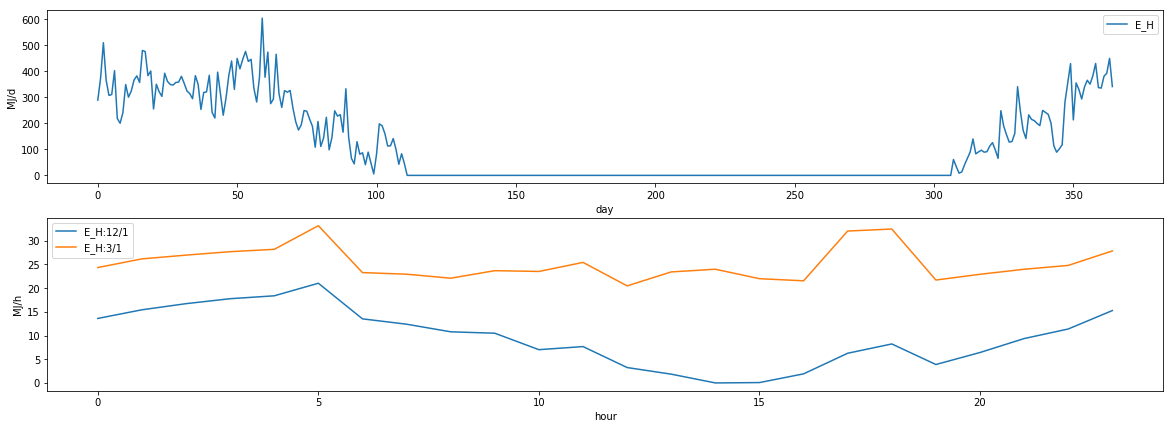

In [18]:
get_each_graph(E_H_d_t_1)

### 計算条件2

In [19]:
param = {"region": 1, "A_A": 120.08, "A_MR": 29.81, "A_OR": 51.34, "A_env": 307.51, "U_A": 0.87, "eta_A_H": 4.3, "eta_A_C": 2.8}
H_MR = {'type': '電気蓄熱暖房器'}
H_OR = None
i = 1

E_H_d_t_2 = calc_results(param, H_MR, H_OR, i)

E_H_d_t:165665.63586507118MJ/y


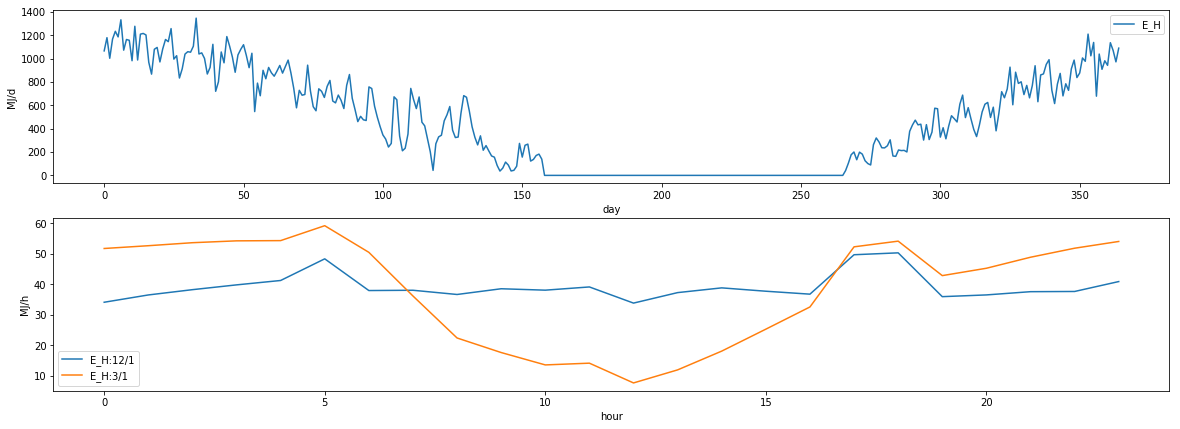

In [20]:
get_each_graph(E_H_d_t_2)

### 計算条件3

In [21]:
param = {"region": 6, "A_A": 90, "A_MR": 25, "A_OR": 40, "A_env": 250, "U_A": 0.87, "eta_A_H": 4.3, "eta_A_C": 2.8}
H_MR = {'type': '電気蓄熱暖房器'}
H_OR = None
i = 1

E_H_d_t_3 = calc_results(param, H_MR, H_OR, i)

E_H_d_t:38353.73611432735MJ/y


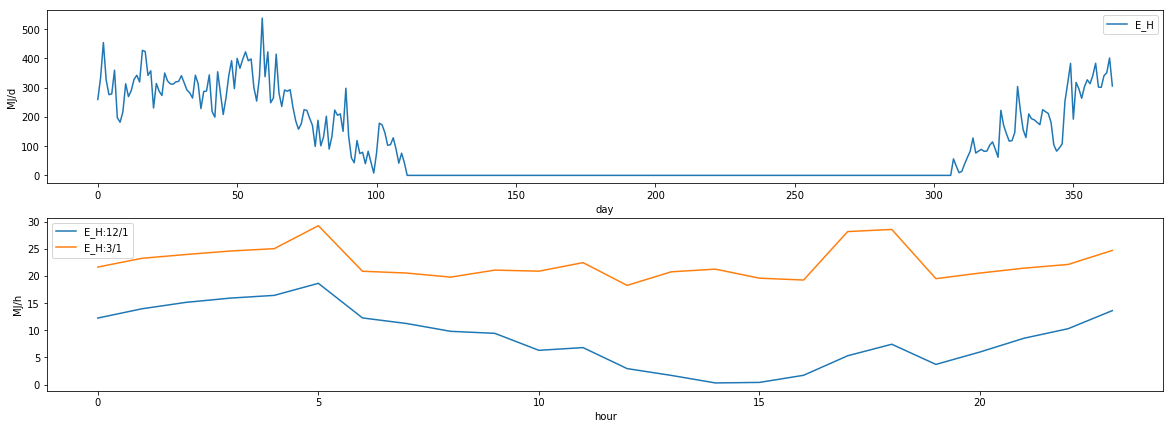

In [22]:
get_each_graph(E_H_d_t_3)

### 計算条件4

In [23]:
param = {"region": 6, "A_A": 120.08, "A_MR": 29.81, "A_OR": 51.34, "A_env": 307.51, "U_A": 0.6, "eta_A_H": 4.3, "eta_A_C": 2.8}
H_MR = {'type': '電気蓄熱暖房器'}
H_OR = None
i = 1

E_H_d_t_4 = calc_results(param, H_MR, H_OR, i)

E_H_d_t:25397.025144980442MJ/y


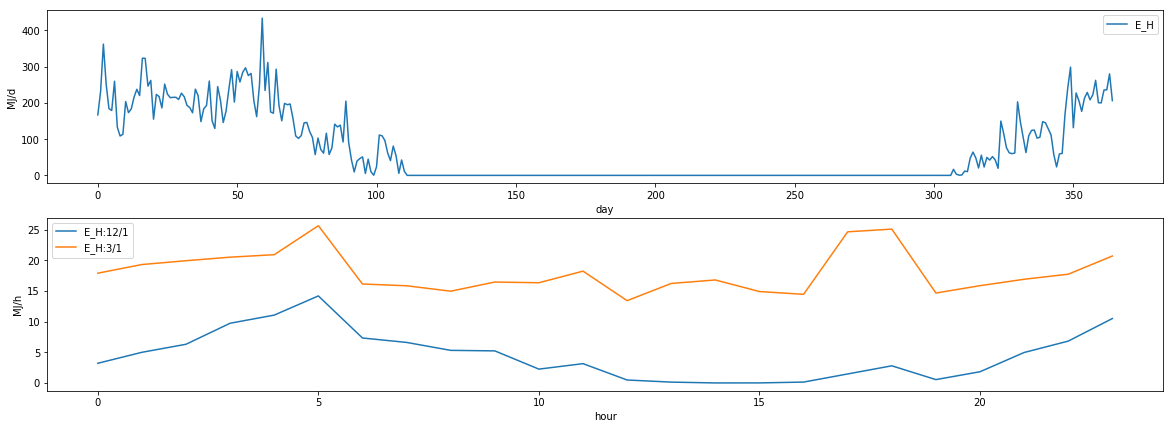

In [24]:
get_each_graph(E_H_d_t_4)

### 計算条件5

In [25]:
param = {"region": 6, "A_A": 120.08, "A_MR": 29.81, "A_OR": 51.34, "A_env": 307.51, "U_A": 0.87, "eta_A_H": 3.0, "eta_A_C": 2.8}
H_MR = {'type': '電気蓄熱暖房器'}
H_OR = None
i = 1

E_H_d_t_5 = calc_results(param, H_MR, H_OR, i)

E_H_d_t:49345.42316664371MJ/y


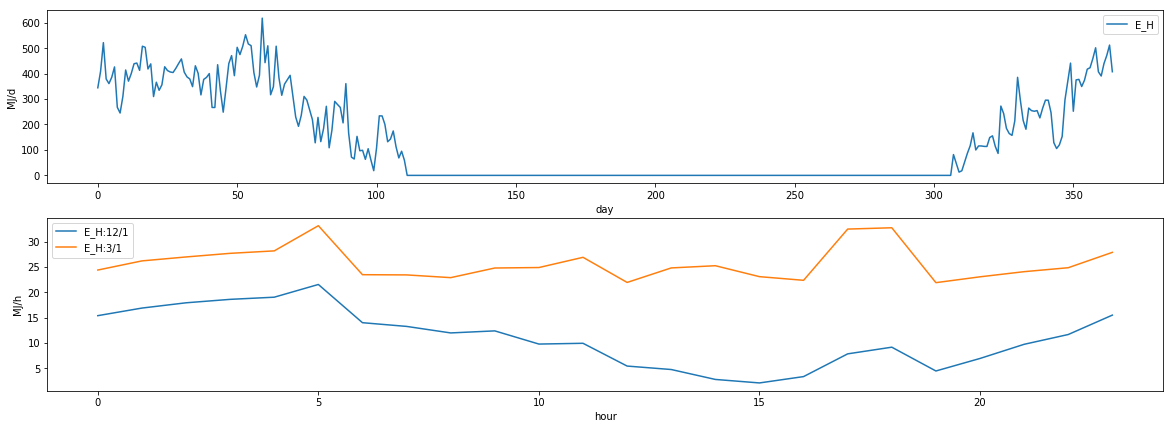

In [26]:
get_each_graph(E_H_d_t_5)

### 計算条件6

In [27]:
param = {"region": 6, "A_A": 120.08, "A_MR": 29.81, "A_OR": 51.34, "A_env": 307.51, "U_A": 0.87, "eta_A_H": 4.3, "eta_A_C": 2.0}
H_MR = {'type': '電気蓄熱暖房器'}
H_OR = None
i = 1

E_H_d_t_6 = calc_results(param, H_MR, H_OR, i)

E_H_d_t:42642.60275773874MJ/y


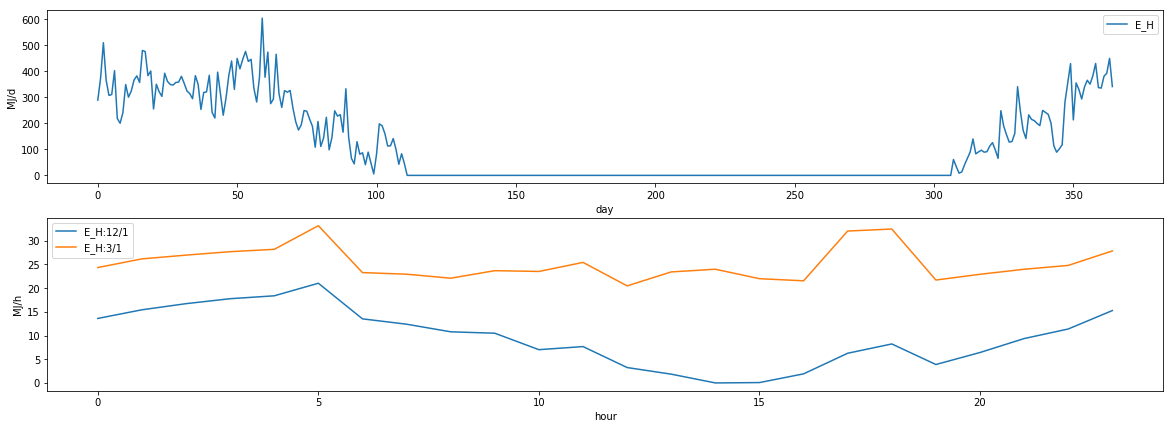

In [28]:
get_each_graph(E_H_d_t_6)

### 計算条件7

In [29]:
param = {"region": 6, "A_A": 120.08, "A_MR": 29.81, "A_OR": 51.34, "A_env": 307.51, "U_A": 0.87, "eta_A_H": 4.3, "eta_A_C": 2.8}
H_MR = {'type': '電気蓄熱暖房器'}
H_OR = {'type': '電気蓄熱暖房器'}
i = 5

E_H_d_t_7 = calc_results(param, H_MR, H_OR, i)

E_H_d_t:13928.948587943942MJ/y


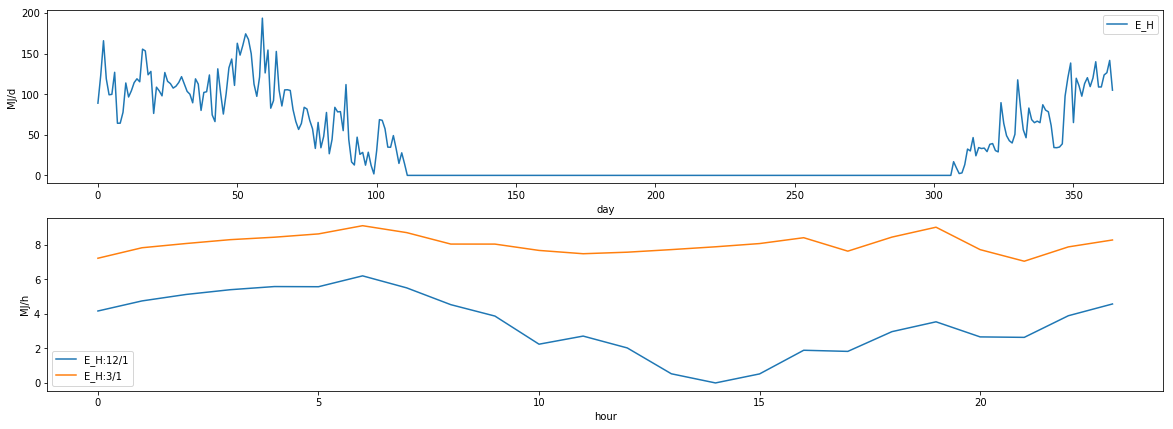

In [30]:
get_each_graph(E_H_d_t_7)

### 比較

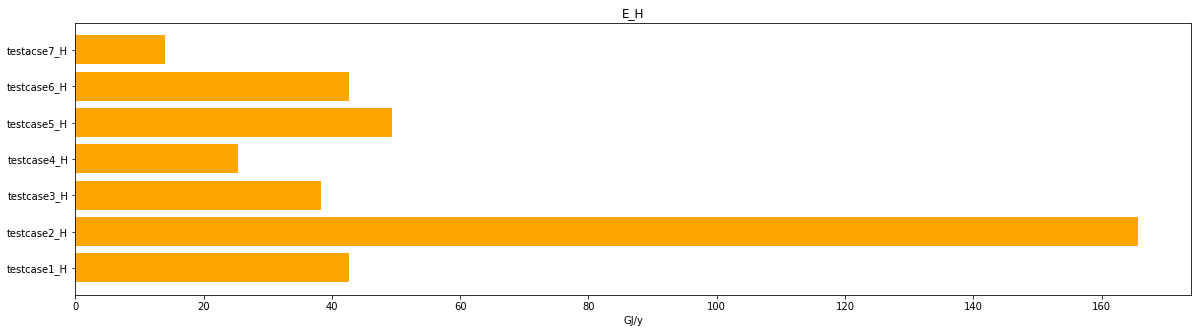

In [31]:
import matplotlib.pyplot as plt

dat_H = {"testcase1_H": np.sum(E_H_d_t_1)/1000, "testcase2_H": np.sum(E_H_d_t_2)/1000, "testcase3_H": np.sum(E_H_d_t_3)/1000, 
         "testcase4_H": np.sum(E_H_d_t_4)/1000, "testcase5_H": np.sum(E_H_d_t_5)/1000, "testcase6_H": np.sum(E_H_d_t_6)/1000,
         "testacse7_H": np.sum(E_H_d_t_7)/1000}

x_H = list(dat_H.keys())
y_H = list(dat_H.values())

fig = plt.figure(figsize=(20,5))

grh_H = fig.add_subplot(111)
grh_H.barh(x_H,y_H, color = "orange")
grh_H.set_xlabel("GJ/y")
grh_H.set_title("E_H")

plt.show()